In [27]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [28]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [29]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279191 entries, 0 to 279190
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    279191 non-null  float64
 1   V1      279191 non-null  float64
 2   V2      279191 non-null  float64
 3   V3      279191 non-null  float64
 4   V4      279191 non-null  float64
 5   V5      279191 non-null  float64
 6   V6      279190 non-null  float64
 7   V7      279190 non-null  float64
 8   V8      279190 non-null  float64
 9   V9      279190 non-null  float64
 10  V10     279190 non-null  float64
 11  V11     279190 non-null  float64
 12  V12     279190 non-null  float64
 13  V13     279190 non-null  float64
 14  V14     279190 non-null  float64
 15  V15     279190 non-null  float64
 16  V16     279190 non-null  float64
 17  V17     279190 non-null  float64
 18  V18     279190 non-null  float64
 19  V19     279190 non-null  float64
 20  V20     279190 non-null  float64
 21  V21     27

In [ ]:
data.isnull().values.any()

Text(0, 0.5, 'Frequency')

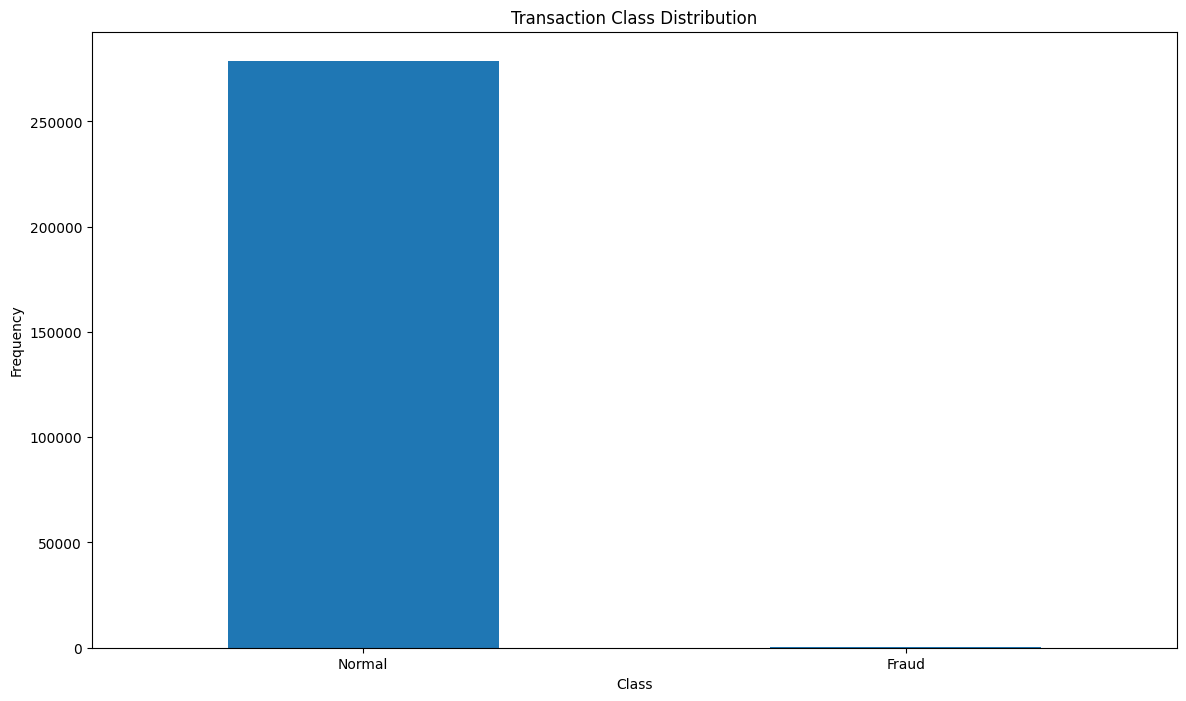

In [31]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [32]:
## Get the Fraud and the normal dataset
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape


(27919, 31)

In [37]:
fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [35]:
print(fraud.shape,normal.shape)


(487, 31) (278703, 31)


In [38]:
fraud.Amount.describe()

count     487.000000
mean      121.913326
std       257.561705
min         0.000000
25%         1.000000
50%         9.130000
75%       105.350000
max      2125.870000
Name: Amount, dtype: float64

In [39]:
normal.Amount.describe()

count    278703.000000
mean         88.676558
std         250.460854
min           0.000000
25%           5.760000
50%          22.190000
75%          77.850000
max       25691.160000
Name: Amount, dtype: float64

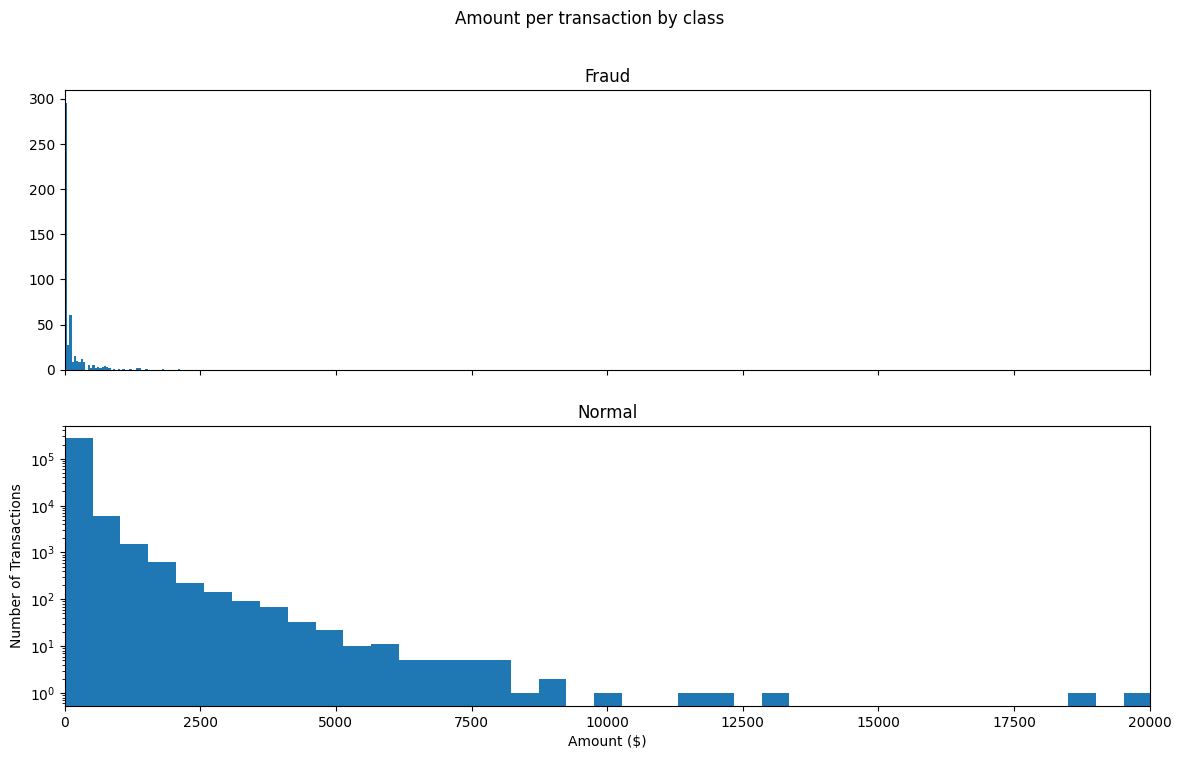

In [40]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [41]:
# Assuming datal is the DataFrame containing all data
Fraud = data1[data1['Class'] == 1]  # Assuming 'Class' column indicates fraud (1 for fraud)
Normal = data1[data1['Class'] == 0]  # Assuming 'Class' column indicates normal transactions (0 for normal)

# Now Fraud and Normal should be separate DataFrames containing fraud and normal transactions respectively


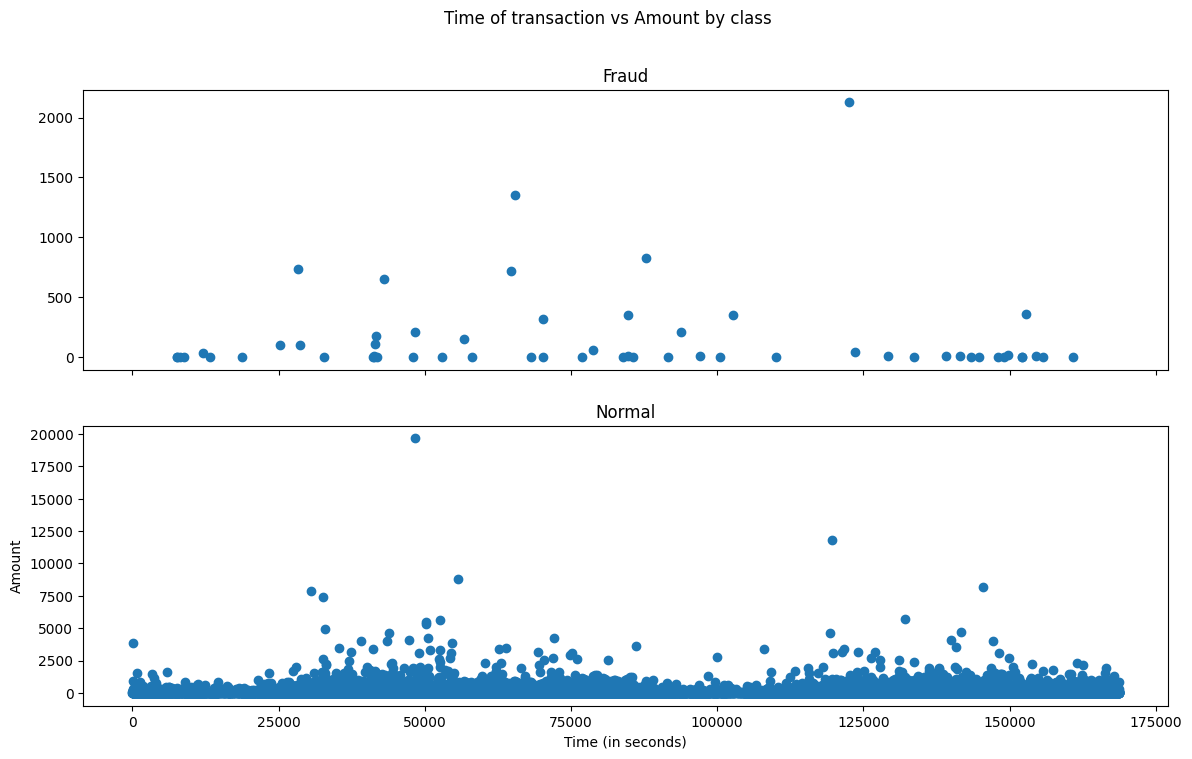

In [43]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

# Plot for Fraud transactions
ax1.scatter(Fraud['Time'], Fraud['Amount'])
ax1.set_title('Fraud')

# Plot for Normal transactions
ax2.scatter(Normal['Time'], Normal['Amount'])
ax2.set_title('Normal')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()


In [44]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(27919, 31)

In [45]:
data.shape

(279191, 31)

In [46]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [47]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.002081763037938337
Fraud Cases : 58
Valid Cases : 27861


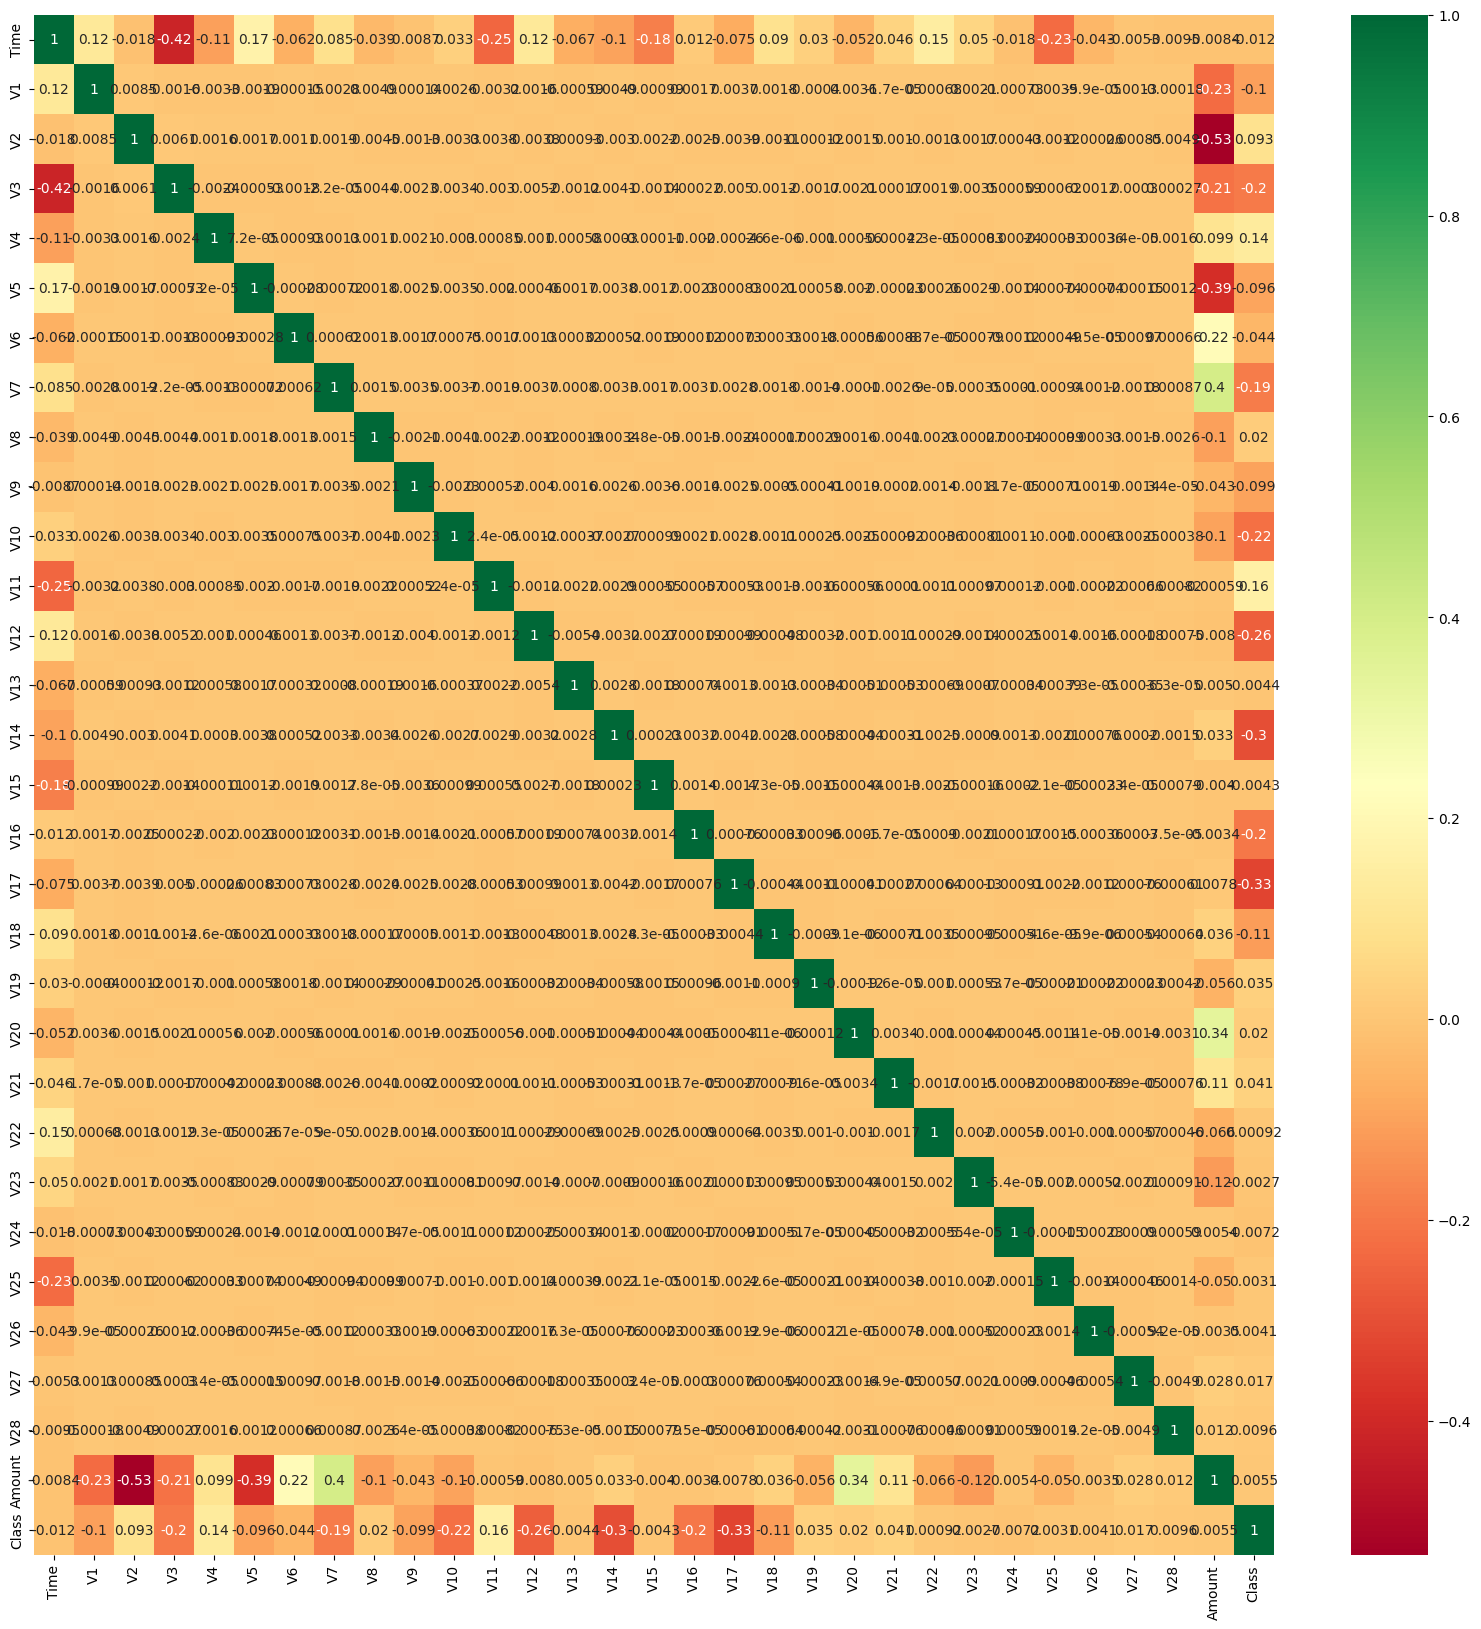

In [48]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(27919, 30)
(27919,)


In [51]:
from sklearn.svm import OneClassSVM

# Define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, max_iter=-1)
}



In [52]:
type(classifiers)

dict

In [53]:
from sklearn.metrics import accuracy_score, classification_report

Fraud = data1[data1['Class']==1]

n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y, y_pred))
    print("Classification Report :")
    print(classification_report(Y, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 75
Accuracy Score :
0.9973136573659515
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27861
         1.0       0.36      0.36      0.36        58

    accuracy                           1.00     27919
   macro avg       0.68      0.68      0.68     27919
weighted avg       1.00      1.00      1.00     27919

Local Outlier Factor: 115
Accuracy Score :
0.9958809412944589
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27861
         1.0       0.02      0.02      0.02        58

    accuracy                           1.00     27919
   macro avg       0.51      0.51      0.51     27919
weighted avg       1.00      1.00      1.00     27919

Support Vector Machine: 8202
Accuracy Score :
0.7062215695404563
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.71  